In [11]:
import numpy as np
import matplotlib.pyplot as plt

### Параметры

In [12]:
R0 = 0.01
r0 = 0.01
w0 = 2
k1 = 0.8
k2 = 0.2
sigma = 0.01
timesteps = 7000

### Исследуемая функция

In [13]:
def f(x, y):
    return np.sin(x) + np.sin(y)

### Начальные условия

In [14]:
x, y = [0], [0]
M = [0]
phi_0 = 0

### Анимат

In [15]:
for t in range(1, timesteps + 1):
    delta_f = f(x[-1], y[-1]) - f(x[-2], y[-2]) if t > 1 else 0
    
    I = k2 * delta_f
    
    xi = np.random.normal(0, sigma)
    M_t = k1 * M[-1] + xi + I
    M.append(M_t)
    
    if M_t > 0:  
        delta_x = R0 * np.cos(phi_0)
        delta_y = R0 * np.sin(phi_0)
    else:  
        w = np.random.normal(0, w0)
        phi = phi_0 + w
        delta_x = r0 * np.cos(phi)
        delta_y = r0 * np.sin(phi)
        phi_0 = phi 
    
    x_new = x[-1] + delta_x
    y_new = y[-1] + delta_y
    x.append(x_new)
    y.append(y_new)

Text(0.5, 1.0, 'Траектория движения анимата')

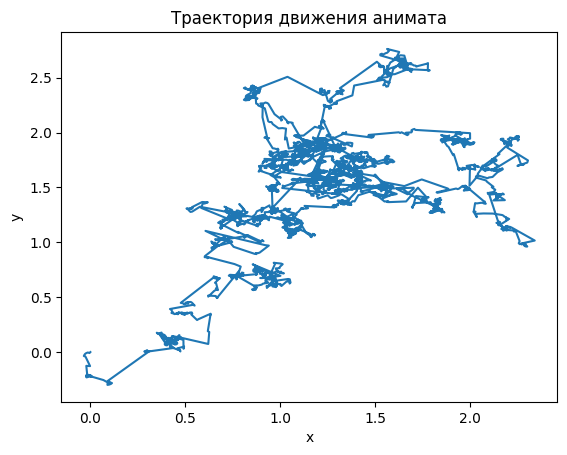

In [19]:
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Траектория движения анимата")

Text(0, 0.5, 'f(x,y)')

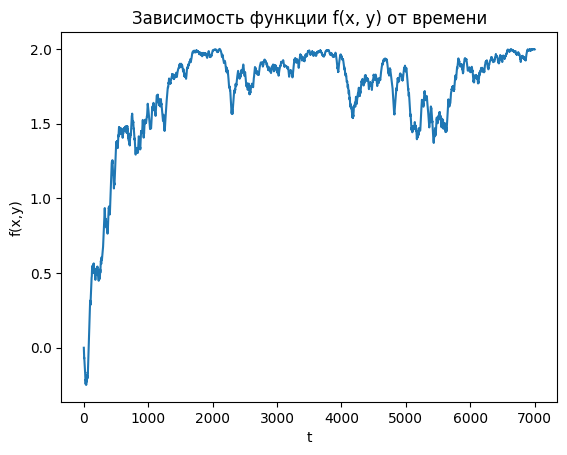

In [26]:
f_values = [f(x[i], y[i]) for i in range(len(x))]
time = range(len(f_values))
plt.plot(time, f_values)
plt.title('Зависимость функции f(x, y) от времени')
plt.xlabel('t')
plt.ylabel('f(x,y)')


Text(0, 0.5, 'M')

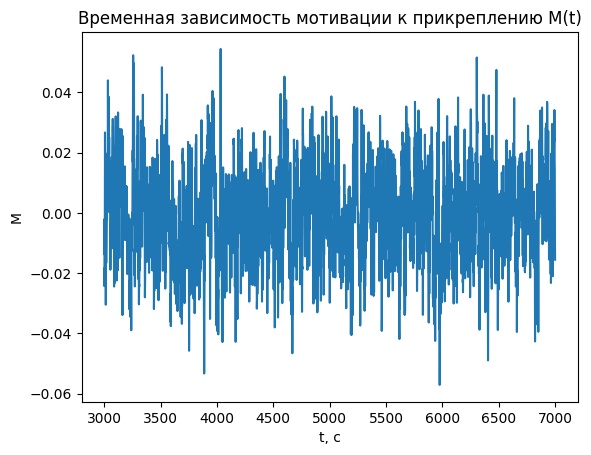

In [30]:
time = range(len(M))
plt.plot(time[3000:], M[3000:])
plt.title('Временная зависимость мотивации к прикреплению M(t)')
plt.xlabel('t, c')
plt.ylabel('M')